In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
# Load data from a CSV file
data = pd.read_csv('exp.csv')

In [ ]:
# Separate features and target variable
X = data[['Current Age', 'Retired Age', 'Annual Income', 'Annual Spending']]
y = data['Investment Risk']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and train the SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [ ]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.32


In [ ]:
# Load new data from a CSV file
new_data = pd.read_csv('new_data.csv')

# Separate features
new_X = new_data[['Current Age', 'Retired Age', 'Annual Income', 'Annual Spending']]

# Make predictions on new data
new_y_pred = clf.predict(new_X)

# Print predictions
print(new_y_pred)

['low' 'low' 'low' ... 'high' 'low' 'low']


In [ ]:
import pandas as pd

def generate_report(new_data, new_y_pred):
    # Create a DataFrame to store the prediction results
    report_data = {'Current Age': new_data['Current Age'],
                  'Retired Age': new_data['Retired Age'],
                  'Annual Income': new_data['Annual Income'],
                  'Annual Spending': new_data['Annual Spending'],
                  'Predicted Risk': new_y_pred}
    report_df = pd.DataFrame(report_data)

    # Calculate the overall accuracy
    accuracy = accuracy_score(new_data['Investment Risk'], new_y_pred)

    # Generate a report summary
    report_summary = f"SVM Classifier Report\n\nAccuracy: {accuracy:.2f}\n"

    # Generate individual risk assessment reports
    individual_reports = []
    for index, row in report_df.iterrows():
        current_age = row["Current Age"]
        retired_age = row["Retired Age"]
        annual_income = row["Annual Income"]
        annual_spending = row["Annual Spending"]
        predicted_risk = row["Predicted Risk"]

        individual_report = f"\nIndividual Risk Assessment\n\nCurrent Age: {current_age}\nRetired Age: {retired_age}\nAnnual Income: ${annual_income:,.2f}\nAnnual Spending: ${annual_spending:,.2f}\nPredicted Risk: {predicted_risk}"
        individual_reports.append(individual_report)

    # Combine the summary and individual reports into a comprehensive report
    report = report_summary + "\n\n".join(individual_reports)
    return report


In [ ]:
new_report = generate_report(new_data, new_y_pred)
print(new_report)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_report(new_data, new_y_pred):
    # Create a DataFrame to store the prediction results
    report_data = {'Current Age': new_data['Current Age'],
                    'Retired Age': new_data['Retired Age'],
                    'Annual Income': new_data['Annual Income'],
                    'Annual Spending': new_data['Annual Spending'],
                    'Predicted Risk': new_y_pred}
    report_df = pd.DataFrame(report_data)

    # Calculate the overall accuracy
    accuracy = accuracy_score(new_data['Investment Risk'], new_y_pred)

    # Generate a report summary
    report_summary = f"SVM Classifier Report\n\nAccuracy: {accuracy:.2f}\n"

    # Generate individual risk assessment reports
    individual_reports = []
    for index, row in report_df.iterrows():
        current_age = row["Current Age"]
        retired_age = row["Retired Age"]
        annual_income = row["Annual Income"]
        annual_spending = row["Annual Spending"]
        predicted_risk = row["Predicted Risk"]

        # Calculate the savings based on risk level
        if predicted_risk == "low":
            savings = annual_income - annual_spending
        elif predicted_risk == "medium":
            savings = annual_income - annual_spending * 0.8
        else:
            savings = annual_income - annual_spending * 0.6

        individual_report = f"\nIndividual Risk Assessment\n\nCurrent Age: {current_age}\nRetired Age: {retired_age}\nAnnual Income: ${annual_income:,.2f}\nAnnual Spending: ${annual_spending:,.2f}\nPredicted Risk: {predicted_risk}\nRecommended Savings: ${savings:,.2f}"
        individual_reports.append(individual_report)

    # Generate a pie chart of the risk distribution
    risk_counts = report_df['Predicted Risk'].value_counts()
    risk_labels = risk_counts.index.to_numpy()
    risk_values = risk_counts.to_numpy()
    plt.pie(risk_values, labels=risk_labels, autopct='%1.1f%%')
    plt.title('Predicted Risk Distribution')
    plt.savefig('risk_distribution.png')

    # Combine the summary, individual reports, and pie chart into a comprehensive report
    report = report_summary + "\n\n".join(individual_reports) + "\n\nPlease refer to the 'risk_distribution.png' file for the pie chart of the risk distribution."

    return report


In [ ]:
new_report = generate_report(new_data, new_y_pred)
print(new_report)


SVM Classifier Report

Accuracy: 0.35

Individual Risk Assessment

Current Age: 38
Retired Age: 68
Annual Income: $396,274.00
Annual Spending: $288,119.00
Predicted Risk: low
Cumulative Savings: $3,352,805.00


Individual Risk Assessment

Current Age: 41
Retired Age: 75
Annual Income: $449,335.00
Annual Spending: $111,174.00
Predicted Risk: low
Cumulative Savings: $11,835,635.00


Individual Risk Assessment

Current Age: 46
Retired Age: 72
Annual Income: $19,727.00
Annual Spending: $518,454.00
Predicted Risk: low
Cumulative Savings: $-13,465,629.00


Individual Risk Assessment

Current Age: 43
Retired Age: 63
Annual Income: $777,884.00
Annual Spending: $397,092.00
Predicted Risk: low
Cumulative Savings: $7,996,632.00


Individual Risk Assessment

Current Age: 38
Retired Age: 75
Annual Income: $510,118.00
Annual Spending: $83,704.00
Predicted Risk: low
Cumulative Savings: $16,203,732.00


Individual Risk Assessment

Current Age: 43
Retired Age: 69
Annual Income: $693,338.00
Annual Spend

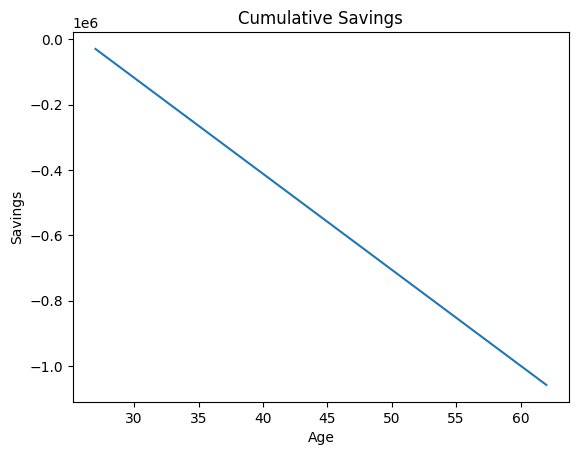

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_report(new_data, new_y_pred):
    # Create a DataFrame to store the prediction results
    report_data = {'Current Age': new_data['Current Age'],
                    'Retired Age': new_data['Retired Age'],
                    'Annual Income': new_data['Annual Income'],
                    'Annual Spending': new_data['Annual Spending'],
                    'Predicted Risk': new_y_pred}
    report_df = pd.DataFrame(report_data)

    # Calculate the overall accuracy
    accuracy = accuracy_score(new_data['Investment Risk'], new_y_pred)

    # Generate a report summary
    report_summary = f"SVM Classifier Report\n\nAccuracy: {accuracy:.2f}\n"

    # Generate individual risk assessment reports
    individual_reports = []
    for index, row in report_df.iterrows():
        current_age = row["Current Age"]
        retired_age = row["Retired Age"]
        annual_income = row["Annual Income"]
        annual_spending = row["Annual Spending"]
        predicted_risk = row["Predicted Risk"]

        # Calculate the savings based on risk level
        if predicted_risk == "low":
            savings = annual_income - annual_spending
        elif predicted_risk == "medium":
            savings = annual_income - annual_spending * 0.8
        else:
            savings = annual_income - annual_spending * 0.6

        # Calculate the cumulative savings
        cumulative_savings = 0
        for year in range(current_age, retired_age + 1):
            cumulative_savings += savings

        individual_report = f"\nIndividual Risk Assessment\n\nCurrent Age: {current_age}\nRetired Age: {retired_age}\nAnnual Income: ${annual_income:,.2f}\nAnnual Spending: ${annual_spending:,.2f}\nPredicted Risk: {predicted_risk}\nCumulative Savings: ${cumulative_savings:,.2f}"
        individual_reports.append(individual_report)

    # Generate a line chart of the cumulative savings
    ages = list(range(current_age, retired_age + 1))
    cumulative_savings = []
    for year in ages:
        if predicted_risk == "low":
            savings = annual_income - annual_spending
        elif predicted_risk == "medium":
            savings = annual_income - annual_spending * 0.8
        else:
            savings = annual_income - annual_spending * 0.6

        cumulative_savings.append(cumulative_savings[-1] + savings if cumulative_savings else savings)

    plt.plot(ages, cumulative_savings)
    plt.title('Cumulative Savings')
    plt.xlabel('Age')
    plt.ylabel('Savings')
    plt.savefig('cumulative_savings.png')

    # Combine the summary, individual reports, and line chart into a comprehensive report
    report = report_summary + "\n\n".join(individual_reports) + "\n\nPlease refer to the 'cumulative_savings.png' file for the cumulative savings graph."

    return report

# Load new data from a CSV file
new_data = pd.read_csv('new_data.csv')

# Separate features
new_X = new_data[['Current Age', 'Retired Age', 'Annual Income', 'Annual Spending']]

# Make predictions on new data
new_y_pred = clf.predict(new_X)

# Generate report and print it
report = generate_report(new_data, new_y_pred)
print(report)

